<a href="https://colab.research.google.com/github/ShrutiChrist/OneAPI-Hakhathon-Project/blob/main/API_Hakhathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ML libraries
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [145]:
!pip install scikit-learn-intelex
!pip install dpcpp-cpp-rt

In [146]:
url= '/content/matches.csv'
mydata = pd.read_csv(url, index_col=0)
mydata.shape


(1389, 27)

In [147]:
mydata.head(100)


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2022-04-16,15:00,Premier League,Matchweek 33,Sat,Away,L,0.0,1.0,Southampton,...,Match Report,NaN,23.0,6.0,17.7,1.0,0.0,0.0,2022,Arsenal
38,2022-04-20,19:45,Premier League,Matchweek 25,Wed,Away,W,4.0,2.0,Chelsea,...,Match Report,NaN,13.0,3.0,20.0,0.0,1.0,1.0,2022,Arsenal
39,2022-04-23,12:30,Premier League,Matchweek 34,Sat,Home,W,3.0,1.0,Manchester Utd,...,Match Report,NaN,13.0,6.0,18.5,1.0,1.0,1.0,2022,Arsenal
0,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Home,W,1.0,0.0,Manchester City,...,Match Report,NaN,14.0,2.0,18.4,0.0,0.0,0.0,2022,Tottenham Hotspur


In [148]:
mydata.head().T


,1,2,3,4,6
date,2021-08-15,2021-08-21,2021-08-28,2021-09-11,2021-09-18
time,16:30,15:00,12:30,15:00,15:00
comp,Premier League,Premier League,Premier League,Premier League,Premier League
round,Matchweek 1,Matchweek 2,Matchweek 3,Matchweek 4,Matchweek 5
day,Sun,Sat,Sat,Sat,Sat
venue,Away,Home,Home,Away,Home
result,L,W,W,W,D
gf,0.0,5.0,5.0,1.0,0.0
ga,1.0,0.0,0.0,0.0,0.0
opponent,Tottenham,Norwich City,Arsenal,Leicester City,Southampton


In [149]:
mydata.columns


Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

In [150]:
mydata["team"].value_counts()


Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

In [151]:
mydata[mydata["team"] == "Liverpool"]


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,...,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,...,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,...,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,...,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool
16,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,Brighton,...,Match Report,NaN,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool


In [152]:
mydata.dtypes


date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

**Convert date to datetime dtype**

*As* we preprocess the data, it is necessary for us to identify the features which have missing values in between. Below we create a count of missing values in each features of the dataset.

The plot display shows the number of data missing in each of the dataset feature.

In [153]:
def print_missing_values(data):
    data_null = pd.DataFrame(len(data) - data.notnull().sum(), columns = ['Count'])
    data_null = data_null[data_null['Count'] > 0].sort_values('Count', ascending=False)
    data_null = data_null/len(data)*100 #percentage
    data_null.reset_index(inplace=True)
    data_null = data_null.rename(columns = {'index':'Features'})

    plt.style.use('ggplot')
    x = data_null['Features']
    y = data_null['Count']
    x_pos = [i for i, _ in enumerate(x)]

    plt.figure(figsize=(4,4))
    plt.bar(x_pos, y, color='green')
    plt.xlabel('Features')
    plt.ylabel('Percentage of missing data')
    plt.title("Column with missing values in the dataset")

    plt.xticks(x_pos, x)
    plt.show()

Number total of rows : 1389


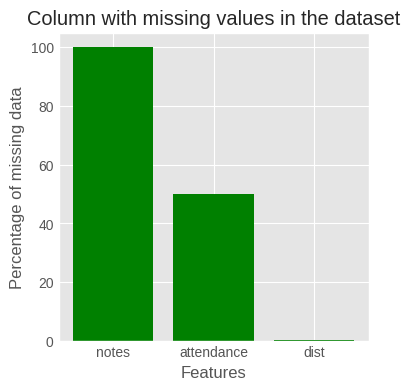

In [154]:
print('Number total of rows : '+ str(mydata.shape[0]))
print_missing_values(mydata)

**Drop 'match report' and 'notes' feature as it does not provide any insight for the predictor.**

In [155]:
mydata.drop(['notes', 'match report'], axis=1, inplace=True)

**Categorize data into Categorical and Numerical values**


In [156]:
def categorize(data):
  num_columns = []
  cat_columns = []

  for col in data.columns.values:
      if data[col].dtypes == 'int64' or data[col].dtypes == 'float64':
          num_columns += [col]
      else:
          cat_columns += [col]
  return [cat_columns, num_columns]

In [157]:
cat_val, num_val = categorize(mydata)


**Median value**

For each of the numerical feature, find the median value and save it as median value of the fearure.

In [158]:
median_val = pd.Series()
for col in num_val:
    median_val[col] = mydata[col].median()
print("Median values for each Numerical features \n\n", median_val)

Median values for each Numerical features 

 gf                1.0
ga                1.0
xg                1.2
xga               1.2
poss             50.0
attendance    32061.0
sh               12.0
sot               4.0
dist             16.9
fk                0.0
pk                0.0
pkatt             0.0
season         2021.0
dtype: float64


**Handle missing values**

As couple of features have missing data in it, these missing values should be replaced before we can train the model. These missing values are replaced by median value generated in the previous code for numerical features. Missing values for categorical features should be replaced by "Missing value".

In [159]:
def handle_missing_values(data, median_val):
    df = data.copy()
    for col in df:
        if col in median_val.index.values:
            df[col] = df[col].fillna(median_val[col])
        else:
            df[col] = df[col].fillna("Missing value")

    return df

In [160]:
mydata = handle_missing_values(mydata, median_val)


# Data distribution based on target label::

In [161]:
def target_distribution(y_var, data):
    val = data[y_var]

    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("PuBu", len(labels))

    # print(cnt)
    # print(labels)
    # print(sizes)

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=colors)
    ax1.set_title('Count plot of '+y_var)

    #------------PERCENTAGE-------------------
    ax2.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%', shadow=True, startangle=130)
    ax2.axis('equal')
    ax2.set_title('Distribution of '+y_var)
    plt.show()

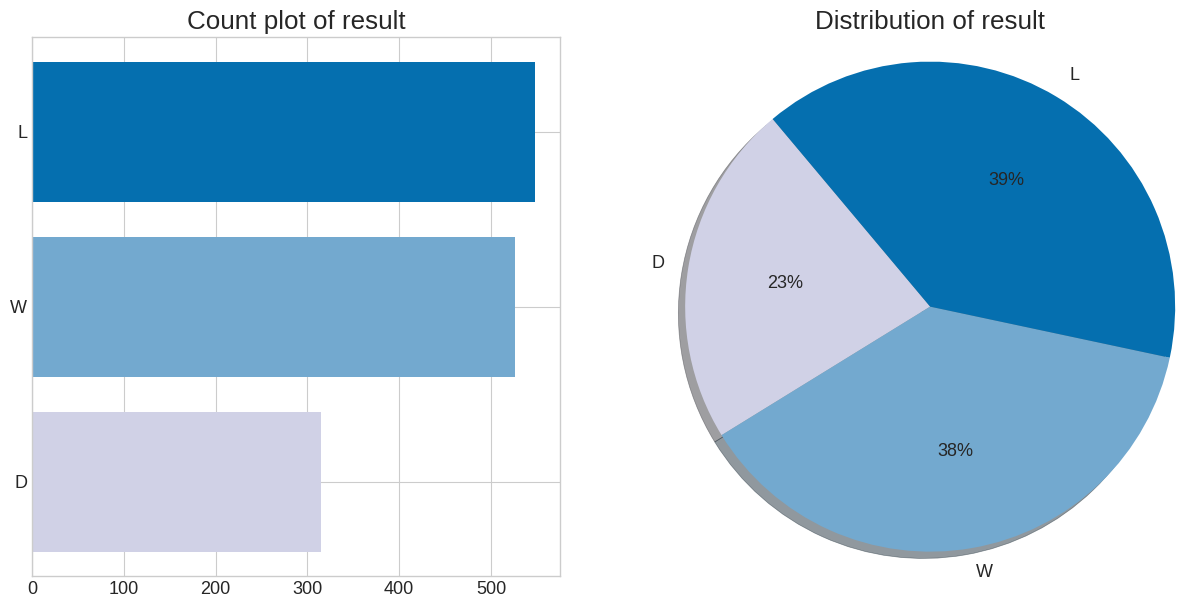

In [162]:
var = 'result'
target_distribution(y_var=var, data=mydata)

# **Label Encode**
Categorical variables are not readable to ML algorithms. Hence, it is necessary to convert them into integer based binary format.

In [163]:
from sklearn.preprocessing import MultiLabelBinarizer

def label_encode(data, categorical_features):
  data_encoded = data.copy()
  categorical_names = {}

# Use Label Encoder for categorical columns
  for feature in categorical_features:
      le = LabelEncoder()
      le.fit(data_encoded[feature])
      data_encoded[feature] = le.fit_transform(data_encoded[feature])
      if feature == 'result':
        categorical_names[feature] = le.classes_
        le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))

  return (data_encoded, categorical_names, le_name_mapping)

In [164]:
mydata



,date,time,comp,round,day,venue,result,gf,ga,opponent,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,4-3-3,Anthony Taylor,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,4-3-3,Graham Scott,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,4-3-3,Martin Atkinson,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,4-3-3,Paul Tierney,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,4-3-3,Jonathan Moss,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,3-4-1-2,Andre Marriner,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,3-5-2,Simon Hooper,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,3-4-3,Jonathan Moss,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,3-4-3,Robert Jones,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United


**Feature Scaling**

Data normalization is important in Machine learning as it is used to standardize the range of features of data. We transform the data such that the numericalfeatures are within a specific range [0,1].

In [165]:
def scale_data(data, numerical_features):
  data_encoded = data.copy()
  for feature in numerical_features:
      val = data_encoded[feature].values[:, np.newaxis]
      mms = MinMaxScaler()
      data_encoded[feature] = mms.fit_transform(val)

  data_encoded = data_encoded.astype(float)
  return data_encoded

Preprocess data
Categorize, label encode and normalize the data.

In [166]:
data_category = categorize(mydata)
categorical_features, numerical_features = data_category[0], data_category[1]

mydata, result_map, name_mapping = label_encode(mydata, categorical_features)
mydata = scale_data(mydata, numerical_features)

In [167]:
print(name_mapping)


{0: 'D', 1: 'L', 2: 'W'}


In [168]:
mydata.head(50)


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,137.0,8.0,0.0,0.0,3.0,0.0,1.0,0.000000,0.111111,18.0,...,10.0,2.0,0.580645,0.266667,0.417476,0.25,0.000000,0.000000,1.0,12.0
2,138.0,6.0,0.0,11.0,2.0,1.0,2.0,0.555556,0.000000,15.0,...,10.0,7.0,0.516129,0.266667,0.430421,0.25,0.000000,0.000000,1.0,12.0
3,141.0,1.0,0.0,22.0,2.0,1.0,2.0,0.555556,0.000000,0.0,...,10.0,13.0,0.806452,0.666667,0.333333,0.00,0.000000,0.000000,1.0,12.0
4,143.0,6.0,0.0,32.0,2.0,0.0,2.0,0.111111,0.000000,10.0,...,10.0,17.0,0.806452,0.533333,0.323625,0.00,0.000000,0.000000,1.0,12.0
6,147.0,6.0,0.0,33.0,2.0,1.0,0.0,0.000000,0.000000,17.0,...,10.0,10.0,0.516129,0.066667,0.378641,0.25,0.000000,0.000000,1.0,12.0
8,149.0,1.0,0.0,34.0,2.0,0.0,2.0,0.111111,0.000000,5.0,...,10.0,14.0,0.483871,0.200000,0.404531,0.00,0.000000,0.000000,1.0,12.0
10,153.0,8.0,0.0,35.0,3.0,0.0,0.0,0.222222,0.222222,11.0,...,10.0,17.0,0.387097,0.200000,0.414239,0.25,0.000000,0.000000,1.0,12.0
11,154.0,6.0,0.0,36.0,2.0,1.0,2.0,0.222222,0.000000,4.0,...,10.0,13.0,0.516129,0.400000,0.343042,0.00,0.000000,0.000000,1.0,12.0
13,158.0,9.0,0.0,37.0,2.0,0.0,2.0,0.444444,0.111111,3.0,...,10.0,11.0,0.741935,0.866667,0.378641,0.25,0.000000,0.000000,1.0,12.0
15,160.0,6.0,0.0,1.0,2.0,1.0,1.0,0.000000,0.222222,6.0,...,10.0,0.0,0.451613,0.200000,0.420712,0.00,0.000000,0.000000,1.0,12.0


# Split data into train and test

In [169]:

train_data, test_data = train_test_split(mydata, test_size=0.3, random_state=42)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [170]:

def count_df(df, var):
  ftr = df[var].tolist()
  count = df['Count'].tolist()
  fig = plt.figure(figsize = (10, 5))
  ax = fig.add_axes([0,0,1,1])
  colors = sns.color_palette("PuBu", len(count))
  ax.bar(ftr, count, color=colors, width=0.4)
  ax.set_ylabel('Count')
  ax.set_xlabel(var)
  plt.show()

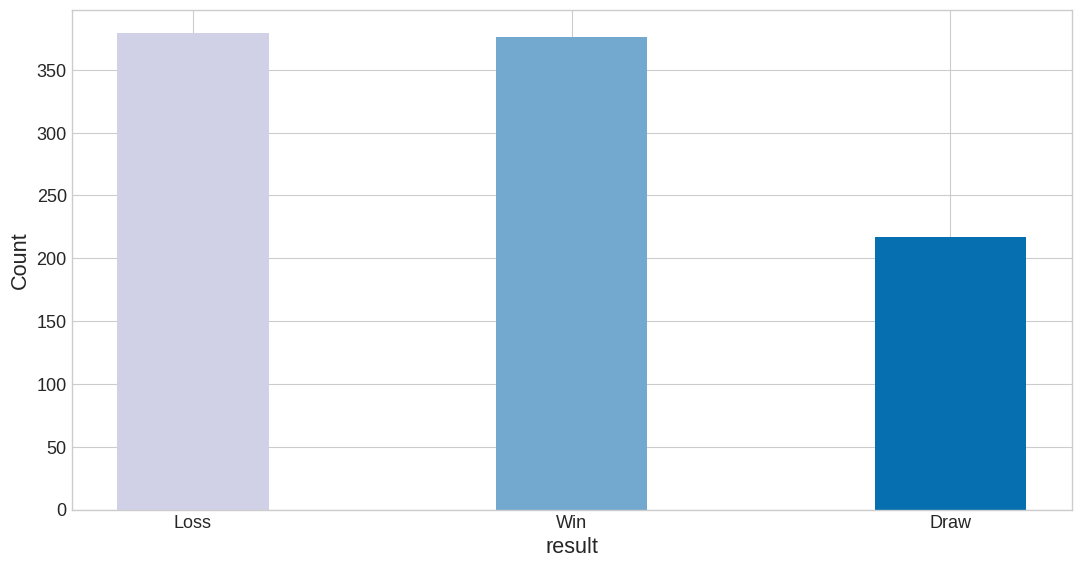

In [171]:

nm = train_data['result'].value_counts().rename_axis('result').reset_index(name='Count')
nm.result.replace([2.0, 1.0, 0.0], ['Win', 'Loss', 'Draw'], inplace=True)
count_df(nm, 'result')

In [172]:
from matplotlib import pyplot
from collections import Counter

def data_balance_visual(y):
  ftr = []
  counter = Counter(y)
  print(counter)
  for c in counter.keys():
    if c == 2.0:
      ftr.append('Win')
    elif c == 1.0:
        ftr.append('Loss')
    else:
      ftr.append('Draw')

  pyplot.figure(figsize=(8,7))
  pyplot.bar(ftr, counter.values(), color="steelblue")
  pyplot.show()

In [173]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

def data_SMOTE(df, col):
  features_SMOTE = df.drop(col, axis=1)
  labels_SMOTE = df[col]
  labels_SMOTE = pd.DataFrame(labels_SMOTE)

  X_SMOTE = features_SMOTE.to_numpy()
  y_SMOTE = labels_SMOTE.to_numpy()

  #flatten numpy array with nested list [[1.], [1.], [1.]]
  flatList = [ item for elem in y_SMOTE for item in elem]
  flatList = np.asarray(flatList)
  data_balance_visual(flatList)

  sampl_s = {0.0:372}
  over = SMOTE(sampling_strategy = sampl_s, random_state=42)

  X_SMOTE, y_SMOTE = over.fit_resample(X_SMOTE, y_SMOTE)
  print(y_SMOTE)

  data_balance_visual(y_SMOTE)
  X_SMOTE = pd.DataFrame(X_SMOTE, columns=features_SMOTE.columns)
  y_SMOTE = pd.DataFrame(y_SMOTE, columns=labels_SMOTE.columns)
  balanced_data = pd.concat([X_SMOTE, y_SMOTE], axis=1, join="inner")

  # counter = Counter(y_SMOTE)
  return balanced_data

# Balance target label to feed ML algorithm enough data on all classes of target.

Counter({1.0: 379, 2.0: 376, 0.0: 217})


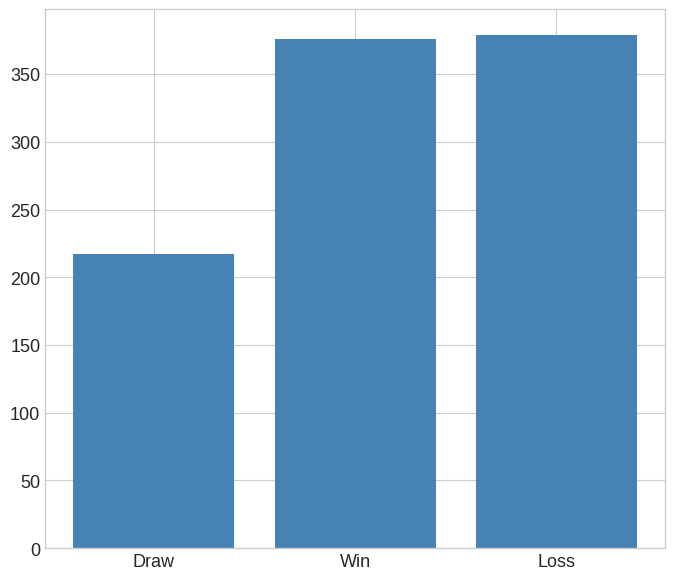

[0. 2. 0. ... 0. 0. 0.]
Counter({1.0: 379, 2.0: 376, 0.0: 372})


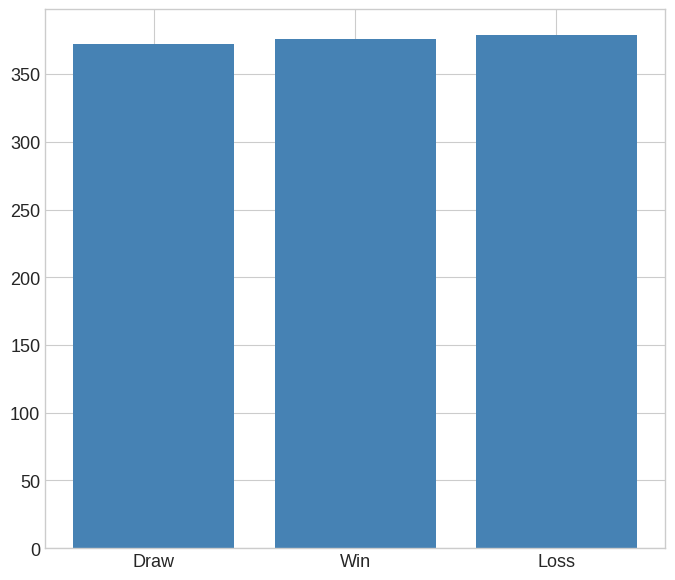

In [174]:
train_data = data_SMOTE(train_data, 'result')


## Split into features and label.

In [175]:
X_train = train_data.drop('result', axis=1)
y_train = train_data['result']

X_test = test_data.drop('result', axis=1).reset_index(drop=True)
y_test = test_data['result'].reset_index(drop=True)

# Function to calculate accuracy of classifier


In [176]:
def accuracy(y_true, y_pred):

    """
    Function to calculate accuracy
    -> param y_true: list of true values
    -> param y_pred: list of predicted values
    -> return: accuracy score

    """

    # Intitializing variable to store count of correctly predicted classes
    correct_predictions = 0

    for yt, yp in zip(y_true, y_pred):

        if yt == yp:

            correct_predictions += 1

    #returns accuracy
    return correct_predictions / len(y_true)

**Naive Bayes Classifier**


In [177]:
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)

labels = [0.0,1.0,2.0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
conf_mat = pd.DataFrame(cm,
                        columns=['Draw','Loss','Win'],
                        index=['Draw','Loss','Win'])

print(conf_mat)
nv_accuracy = accuracy(y_test, y_pred)
print("Accuracy of Decision Tree Model is: "+str(nv_accuracy)+" %")

      Draw  Loss  Win
Draw    61    12   25
Loss    34   125   10
Win     52     5   93
Accuracy of Decision Tree Model is: 0.6690647482014388 %


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Random Forest Classifier


In [178]:
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.ensemble import RandomForestClassifier  # Import the Random Forest classifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 30, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and CV score
print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
print(grid_search.best_params_)

# Evaluate the model using cross-validation
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Print confusion matrix and accuracy on the test set
clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Create and print confusion matrix
labels = [0.0, 1.0, 2.0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
conf_mat = pd.DataFrame(
    cm,
    columns=['Draw', 'Loss', 'Win'],
    index=['Draw', 'Loss', 'Win']
)

# Calculate and print accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest is: " + str(rf_accuracy) + " %")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameter (CV score=0.975):
{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.97 (+/- 0.03)
Accuracy of Random Forest is: 0.9592326139088729 %


**Decision Tree Classifier**

In [179]:
from sklearnex import patch_sklearn
patch_sklearn()

DTC = DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth': [2, 4, 6, 8, 10]}

grid_search = GridSearchCV(DTC, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
print(grid_search.best_params_)

# Evaluate the model using cross-validation
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Print confusion matrix and accuracy on test set
clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

labels = [0.0,1.0,2.0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
conf_mat = pd.DataFrame(cm,
                        columns=['Draw','Loss','Win'],
                        index=['Draw','Loss','Win'])

dt_accuracy = accuracy(y_test, y_pred)
print("Accuracy of Decision Tree Model is: "+str(dt_accuracy)+" %")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameter (CV score=1.000):
{'max_depth': 6}
Accuracy: 1.00 (+/- 0.00)
Accuracy of Decision Tree Model is: 1.0 %


# Visualize the performance of each classifier and see which classifier performs the best.

The accuracy score achieved using Random Forest is: 95.92326139088729 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Naive Bayes is: 66.90647482014388 %


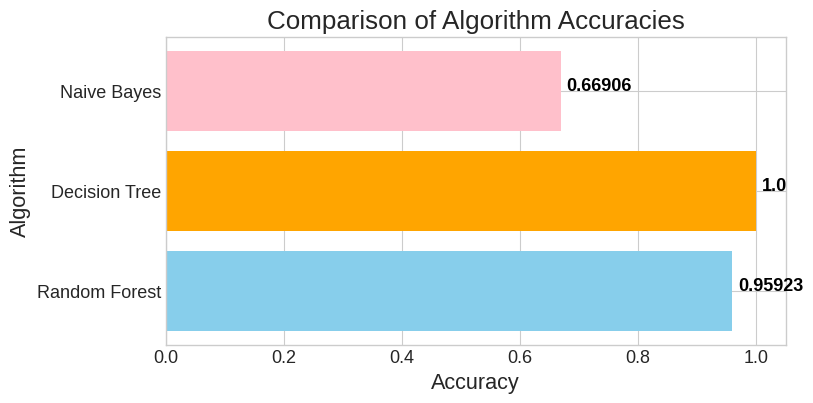

In [180]:
import matplotlib.pyplot as plt

# Define the accuracy scores and algorithms
scores = [rf_accuracy, dt_accuracy, nv_accuracy]
algorithms = ["Random Forest", "Decision Tree", "Naive Bayes"]

# Print accuracy scores for each algorithm
for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i] + " is: " + str((scores[i] * 100)) + " %")

# Plot the bar chart to compare the accuracies
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(algorithms, scores, align='center', color=['skyblue', 'orange', 'pink'])
ax.set_xlabel('Accuracy')
ax.set_ylabel('Algorithm')
ax.set_title('Comparison of Algorithm Accuracies')

# Add the score values to the plot
for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 5)), color='black', fontweight='bold')

plt.show()


Inference:

 The output indicates that there is a significant difference in possession among different captains with a p-value less than 0.05, it suggests that the average possession values of matches led by different captains are statistically different from each other.

In practical terms, this means that the choice of captain may have a discernible impact on the team's possession performance during matches. This information can be valuable for team management and coaching staff in decision-making processes related to captaincy and tactical strategies.

In [181]:
# Statistical Analysis
# Perform statistical tests to determine significant differences in performance metrics among different captains
from scipy.stats import f_oneway

# Example: Perform ANOVA test for possession among different captains
possession_stats = [mydata[mydata['captain'] == captain]['poss'].mean() for captain in mydata['captain'].unique()]
f_statistic, p_value = f_oneway(*[mydata[mydata['captain'] == captain]['poss'] for captain in mydata['captain'].unique()])
if p_value < 0.05:
    print("There is a significant difference in possession among different captains (p-value < 0.05)")
else:
    print("There is no significant difference in possession among different captains (p-value >= 0.05)")

# You can repeat the above process for other performance metrics such as 'sh', 'sot', 'dist', etc.


There is a significant difference in possession among different captains (p-value < 0.05)
